In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#to normalize the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
from sklearn.metrics import (precision_score,
                           recall_score,
                           f1_score,
                           accuracy_score,
                           precision_recall_curve,
                           roc_auc_score,
                            confusion_matrix,
                            roc_curve, ConfusionMatrixDisplay)
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler 

In [62]:
#Function to evaluate 
def evaluate (model, x, y, threshold = 0.5):
    """ function to evaluate our trained model with different metrics 
    model : Trained Model (classifier)
    
    x:validation features 
    y: Target in validation data 
    Threshold: Value to filter predictions 
    """
    
    pred_proba = model.predict_proba(x)[:, 1] #This will return x 2 array where the 2 is column with prob for the 
    pred_class = np.round(pred_proba  > threshold ) #This converts to 0 or 1 
    acc = accuracy_score (y, pred_class)
    recall = recall_score(y, pred_class)
    precision = precision_score (y, pred_class)
    f1 = f1_score (y, pred_class)
    
    df = pd.DataFrame({ "Accuracy": acc, 
                       "Precision": precision, 
                       "Recall":recall,
                       "F1" : f1}, index = [0])
    conf = confusion_matrix(y, pred_class, labels = [0,1]) ##If the class is more than 2, then use 0, 1, 2 
    disp = ConfusionMatrixDisplay (conf, display_labels = [0,1]) #If the class is more than 2, then use 0, 1, 2 
    disp.plot()
    plt.show()
    return df 

In [63]:
#Function to train a model 
def train(model, x , y):
    '''
    function to train the model and compute accuracy 
    model: model algorithm not yet trained 
    x: Train features
    y: Train Target 
    '''
    trained_model = model.fit(x,y)
    preds = trained_model.predict(x)
    acc = accuracy_score(y, preds)
    print(f"Train Accuracy: {acc}")
    return trained_model 

## Model Evaluation and Improvement
- Having discussed the fundamentals of supervised learning, and
having explored a variety of machine learning algorithms, we will now dive more
deeply into evaluating models and selecting parameters.

- Here, we will expand on two aspects of this evaluation:
    - introduce cross-validation, a more robust way to assess generalization performance than a single
       split of the data into a training and a test set.
    - discuss methods to evaluate classification and regression performance that go beyond the default measures of accuracy and $R^2$ provided by the score method. We will also discuss grid search, an effective method for adjusting the parameters in supervised models for the best generalization performance.

## Cross-validation
- Cross-validation is a statistical method to evaluate generalization performance in a
more stable and thorough way than using a split into training and test set.
In cross-validation, instead of splitting the data set in to a training set and a test set,
the data is split repeatedly and multiple models are trained.
The most commonly used version of cross-validation is k-fold cross-validation, where
k is a user specified number, usually five or ten. When performing five-fold crossvalidation, the data is first partitioned into five parts of (approximately) equal size,
called folds.

## Cross-validation Implementation in scikit-learn
- Cross-validation is implemented in scikit-learn using the cross_val_score function
from the model_selection module.
The parameters of the cross_val_score function are the model we want to evaluate,
the training data and the ground-truth labels.



In [65]:
#path = r"C:\Users\ajayi\OneDrive\Desktop\Training_Recordings\Data\Classification_data\telecom_churn.csv"

df = pd.read_csv('telecom_churn.csv')

df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


### Select features and target

In [66]:
x = df.drop("Churn", axis = 1)
y = df["Churn"]

### Implementing Cross-validation 

In cross-validation, instead of splitting the data set in to a training set and a test set, the data is split repeatedly and multiple models are trained. The most commonly used version of cross-validation is k-fold cross-validation, where k is a user specified number, usually five or ten. When performing five-fold crossvalidation, the data is first partitioned into five parts of (approximately) equal size, called folds.

In [67]:
gb = GradientBoostingClassifier(random_state = 0)

#Estimation = model, x = features, y = target, scoring = performance to measure (accurate or recall or others) , n_jobs = -1 =  use all the CPU cores i have
#cv = 5 - cross validation k-fold  
scores = cross_val_score( gb, x , y, scoring = "recall", cv = 5) 

In [68]:
scores

array([0.65979381, 0.64948454, 0.65979381, 0.61458333, 0.69791667])

What it does here is that having identified ur k-fold for split in each split, it does the training and testing in background to come up with a generalization score but it doesnt save it, Thats why if  u try do a predition by using gb.predict(x), it wont give a result.

Or rather, it gives a generaglisation score u wud have or score when the data is exposed to new data when some optimization by hyperparameters and other techniques have not been done or score u wud get that will prompt an optimization

In [69]:
#Now the mean will used to determine what the genralisation score wud av been if we had splitted 
np.mean(scores)

0.6563144329896907

On new data, it will be give a perfromace score opf 65% recall. 

### Split the dataset into training, validation and test data

In [70]:
#Here the data x and y is splitted into validation and test 1.e test size is 20%
x_train_val, x_test, y_train_val, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0, stratify = y) 

#Now split the validation sets into validation and train, now split the 80% into
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, 
                                                  test_size = 0.2, random_state = 0, 
                                                  stratify = y_train_val ) 

In [71]:
gb_model = train(gb, x_train, y_train)

Train Accuracy: 0.9568480300187617


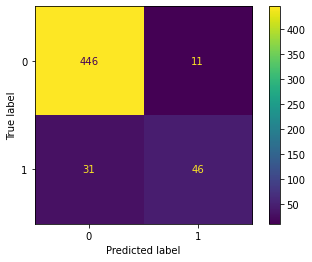

,Accuracy,Precision,Recall,F1
0,0.921348,0.807018,0.597403,0.686567


In [72]:
evaluate(gb_model, x_val, y_val )

Deduction 

Having used the cross validation, we got an average score of 69% recall; but when passed thru modelling, score remained almost 60% which had been earlier proved thru CV that some hyper parameter tunning will be required  

### Balance the dataset

In [73]:
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(random_state = 0)
#X_sm, y_sm = smote.fit_resample(X, y)

In [74]:
#x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 0, stratify = y_sm)

### Important note
- It is important to keep in mind that cross-validation is not a way to build a
model that can be applied to new data. Cross-validation does not return a model.
When calling cross_val_score, multiple models are build internally, but the purpose
of cross-validation is only to evaluate how well a given algorithm will generalize when
trained on a specific dataset. 

## Stratified K-Fold Cross-validation
- Splitting the dataset into k-folds by starting with the first 1/k-th part of the data as
described above might not always be a good idea.


-  In stratified cross-validation, we split
the data such that the proportions between classes are the same in each fold as they
are in the whole dataset, as illustrated in the Figure below:

Hint:

Say in the opriginal Data, the ratio of the classes are in the 10:90, so what it does for each k-fold split is that, the same ratio of 10:90 will also be maintained in the split 

In [75]:
#mglearn.plots.plot_stratified_cross_validation()

### Implementing the standard KFold cross-validation in scikit-learn
- By default, scikit-learn uses the standard kfold for regression problems, and stratified kfold for classification problems.
However, we can still initiate the standard kfold for classification problems, even though it is bad idea.


In [76]:
from sklearn.model_selection import KFold

# instantiate it
kfold = KFold(n_splits=5, shuffle = True) #by default scikit implements kfold for regerssion, so set shuffl

# create an instance of the Gradient Boosting model
gb1 = GradientBoostingClassifier(random_state=0)

# assign the kfold splitter to the cv parameter in the cross_val_score; by default sklearn uses stratify; here use cv = k-fold
#meaning dont work as stratify but as the usual statndard way ; but also in the standard way, its a regression problem solving by dault 
#where the shuffle is false; so since we are solving on classification, use shuffle - meaning shuffle the classes 
#Also if i dont specify the k-fold,scikit learn will use stratify by default; so becos i want the standard approach i ill create 
#an instance of k-fold from scikit learn 
scores1= cross_val_score(gb1, x, y, cv = kfold, scoring = "recall")

print("KFold scores: {}".format(scores1))

KFold scores: [0.68181818 0.63157895 0.67       0.65384615 0.67708333]


## Leave-One-Out cross-validation
- Another frequently used cross-validation method is leave-one-out. You can think of
leave-one-out cross-validation as k-fold cross-validation where each fold is a single
sample. For each split, you pick a single data point to be the test set. This can be very
time-consuming, in particular for large datasets, but sometimes provides better estimates on small datasets.

In [77]:
# from sklearn.model_selection import LeaveOneOut

# loo = LeaveOneOut()

# # assign the loo splitter to the cross_val_score
# scores = cross_val_score(gb, x_train, y_train, cv = loo, scoring = "recall")

# print("Number of iterations: {}".format(len(scores)))
# print("Leave-One-Out mean score: {}".format(scores.mean()))

## Hyperparameter Tuning
- Here, we discuss how to improve the model's generalization performance by tuning its parameters. The two most common methods 
are:
    - **Grid search**
    - **Randomized search**

    
### Grid Search
- This means trying all possible combinations of the parameters of interest. Consider the case Gradient Boosting. As we discussed in the last class, there are two important parameters: the max_depth and learning_rate. Say we want to try values 0.001, 0.01, 0.1, 1 and 10 for the parameter learning_rate, and 1 through 4 for max_depth. Because we have five different settings for learning_rate and 4 for max_depth that we want to try, we have 20 combinations of parameters in total.

### Simple Grid Search
- We can implement a simple grid-search just as for-loops over the two parameters,
training and evaluating a classifier for each combination:

## Manual grid search

This infers what works underground for the workings of the hyperparameter tunning mechnaism or method  

In [78]:
# loop through the combination values of both parameters
best_score = 0
for lr in [0.001, 0.01, 0.1, 1, 10]:
    for md in range(1, 5):
        gb = GradientBoostingClassifier(random_state=0, learning_rate=lr, max_depth=md)
        gb.fit(x_train, y_train)
        score = gb.score(x_val, y_val)
        
        if score > best_score:
            best_score = score
            best_parameters = {'Learning_rate': lr, 'Max_depth': md}

print("Best score: {}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.9213483146067416
Best parameters: {'Learning_rate': 0.1, 'Max_depth': 3}


## The dangers of overfitting the parameters and the validation set
- The accuracy we got above may be overly optimistic and not reflect the actually performance on new data because,
we used the test set to select the parameter values.


- In reality, it is best to split our data into training, validation, and test sets, so that we use the training to
build the model, select the parameters with the validation set, and evaluate the model with the selected parameters with
the test set.

In [79]:
#mglearn.plots.plot_threefold_split()

## Implementing Grid Search in scikit-learn
- To use the GridSearchCV class, you first need to specify the
parameters you want to search over using a dictionary. GridSearchCV will then perform 
all the necessary model fits. The keys of the dictionary are the names of parameters 
we want to adjust (as given when constructing the model), in this case C and
gamma, and the values are the parameter settings we want to try out.

In [89]:
# import the grid search model and the estimator
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV #whether gridsearch or Randomized, the parameter below is key
#it can be para_grid for gridsearch or para_rand for randomizedsearch  

# set the parameters to tune; if u wud add penalty, the create its own in list - 'Penalty': ["l1", "l2"]
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1, 10],
             'max_depth': [1, 2, 3, 4]} # here u created a distionary so,it is seen as a list, so u dont need pass an asterick 
#Unlike it been created as an output, then an asterik will be needed or u put each value in the dict as an individual entity into the instantiated class or object  
# instantiate the models
gb = GradientBoostingClassifier(random_state=0)
#gridsearch is just being used to get the best parameter for the Gradientbooting that will give the best sets of combinations for a better perfromance score 
#Having gotten the score, we will go back to the model to be deployed and we tryout those generated parameters 
grid = GridSearchCV(gb, param_grid, cv = 5, n_jobs = -1, scoring = "recall")


# fit the grid search model on the training set
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [1, 2, 3, 4]},
             scoring='recall')

In [85]:
best_params = grid.best_params_ #having trained, this is your best parameter which will also be best for testing 
best_params

{'learning_rate': 10, 'max_depth': 2}

In [86]:
grid.best_score_ #This is your training score on recall 

0.8153886832363829

In [87]:
#Now rebuild model based on this gotten hyper parameters  

In [90]:
#gb_imp = GradientBoostingClassifier(**best_params, random_state = 0) #what that ** does is to let the best_params make use of the dictionary
#as best params is a dictionary or better still, impute the parameters manually 

#gb_imp = GradientBoostingClassifier( learning_rate = 10, max_depth = 2, random_state = 0)
gb_imp = GradientBoostingClassifier( **best_params, random_state = 0) #From top u will see that result came as a dictionary unlike u creating one, so it can av the **
#gb_imp = GradientBoostingClassifier(**best_params, random_state = 0) - here best param in disctionary 

gb_imp.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=10, max_depth=2, random_state=0)

In [57]:
#Lets make use of our training and evaluating function; our training will return a training 

gb_imp_model = train( gb_imp, x_train, y_train) #care less about the training accuracy as we declared score performance during grid serach for perfromance on the recall 

Train Accuracy: 0.14915572232645402


Train Accuracy: 0.14915572232645402


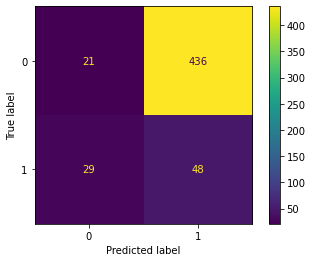

,Accuracy,Precision,Recall,F1
0,0.129213,0.099174,0.623377,0.171123


In [58]:
gb_imp_model = train( gb_imp, x_train, y_train)
gb_imp_df = evaluate(gb_imp, x_val, y_val)
gb_imp_df 

Because ourfocus was on the recall based on perfromance setup; we were able to get that recall score  

### Randomized search 

In [27]:
# set the parameters to tune; if u wud add penalty, the create its own in list - 'Penalty': ["l1", "l2"]
param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1, 10],
             'max_depth': [1, 2, 3, 4]}

# instantiate the models
gb = GradientBoostingClassifier(random_state=0)
grid = RandomizedSearchCV(gb, param_grid, cv = 5, n_jobs = -1, scoring = "recall")


# fit the grid search model on the training set
grid.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1,
                                                          10],
                                        'max_depth': [1, 2, 3, 4]},
                   scoring='recall')

In [28]:
best_params = grid.best_params_ 
best_params

{'max_depth': 2, 'learning_rate': 10}

In [29]:
best_score = grid.best_score_
best_score

0.8153886832363829

Train Accuracy: 0.14915572232645402


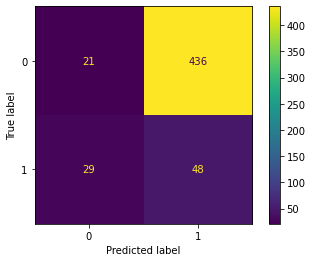

,Accuracy,Precision,Recall,F1
0,0.129213,0.099174,0.623377,0.171123


In [30]:
##Now Rebuild Model 
gb_imp_model = train( gb_imp, x_train, y_train)
gb_imp_df = evaluate(gb_imp, x_val, y_val)
gb_imp_df 

In [31]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


## TUNNING A SINGLE HYPERPARAMTER 

In a single hyper-parameter tunning, we care only about the number of trees or No of estimators whereas for the multiple tunning, we care about the search space as the major argument - The search space itself consists of many hyper paramters to give best optimization  

In [32]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 

### Define Objective function 

In [33]:
#Define the fuction we want to minimize 
def objective (n_estimators): #Objective fxtn is a function to minimize loss with parameter as the no of estimator - for a random forest it is the no of tree to use for best optimization 
    model = RandomForestClassifier( n_estimators = n_estimators, random_state = 0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    fn = np.sum(np.logical_and(y_val == 1, y_pred ==0)) #depending on the perfromance measure for ur loss whether false negative or from 1-accuracy score 
    #acc = accuracy_score(y_pred, y_val)
    #loss = 1 - acc
    return{'loss': fn , 'status': STATUS_OK} #Status here is the status of the experiment. 
                

In [34]:
#define a value to search over for n_estimator 
search_space = hp.randint('n_estimators', 200, 1000 )  #take algorithm within a range btw 200 and 1000; hp is like numpy  

In [35]:
#Set hyperparameter tunning algorithm  
algorithm = tpe.suggest #Suggest algorith for me 

In [36]:
#Define a value to search over for n_estimator; meaning within this range, give a value for n_estimator 
search_space = hp.randint('n_estimators', 100, 2000)

In [37]:
best_params =fmin(fn = objective, space = search_space, algo = algorithm, max_evals = 30 )
#Max eval is the number of evaluation is the number of trials  as seen in below result after the percentage is the max evaluation 

100%|██████████| 30/30 [01:49<00:00,  3.66s/trial, best loss: 29.0]


In [38]:
best_params # this can come as argument into the algorith as a dictionary using **best_params or as an entity 'n_estimator' = 890

{'n_estimators': 975}

In [39]:
#Now rebuild model with the best parameters 
#rf = RandomForestClassifier(**best_params, random_state = 0, n_jobs = -1, class_weight = {0:0.1, 1:0.9})
rf = RandomForestClassifier( n_estimators= 890, random_state = 0, n_jobs = -1, class_weight = {0:0.1, 1:0.9})

In [40]:
rf_model = train(rf, x_train, y_train) #This is overfitting - ns 

Train Accuracy: 1.0


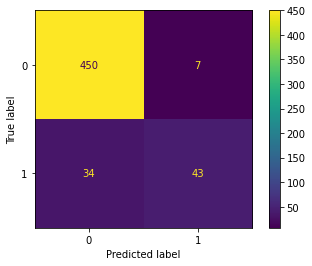

,Accuracy,Precision,Recall,F1
0,0.923221,0.86,0.558442,0.677165


In [41]:
evaluate(rf_model, x_val, y_val)

Deduction 

Did u notice the recall is still low despite having the best combination of parameeters,this is because we have got an imbalance data; unlike covenmtional approach where we tend to balance the Data using stratify during split, which then optimization from Data using the SMOTE, Undersampling and oversampling techniquye  

## TUNNING WITH MULTIPLE HYPERPARAMTERS 

In [42]:
#Define the fuction we want to minimize 
def objective (search_space): #Objective fxtn is a function to minimize loss with parameter as the no of estimator. for a random forest it is the no of tree to use for best optimization 
    model = RandomForestClassifier( **search_space, random_state = 0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    fn = np.sum(np.logical_and(y_val == 1, y_pred ==0)) #depending on the perfromance measure for ur loss whether false negative or from 1-accuracy score or simply wat u want to monitor  
    #The fn part is just like the truth table, saying for everywhere it it is actually 1 but predict 0, sum it up and return the sum which the will be used as accuracy evavluation 
    #acc = accuracy_score(y_pred, vy_val)
    #loss = 1 - acc
    return{'loss': fn , 'status': STATUS_OK} #Status here is the status of the experiment. 

In [43]:
##New search space 
search_space = { 'n_estimators': hp.randint('n_estimators', 100, 2000),
                'max_depth':  hp.randint('max_depth',3,7), 'min_samples_split': hp.uniform('min_samples_split',0, 1 ),
               'min_samples_leaf': hp.randint('min_samples_leaf',1, 10 ),
               'criterion': hp.choice('criterion', ['gini', 'entropy']),
               'max_features':hp.choice('max_features', ['sqrt', 'log2'])}

## Note 
Always note that the minimum sample split must either be declared as 0, 1 meaning it will take the percentage of total no of features
in percentage wise 
Else, assign value between 2 and infinity meaning it will take values between 2 as min or any value higher than 2 as the exact no of features of to be taken as the min sample split

The split is the decisions from a single feature that contributes more from the gini or entropy, then the min sample leaf is the node under each min leaf 

And the feature is the number of features that gave root to the tree for decision 

In [44]:
##Implement Hyperopt
best_params = fmin(fn = objective, space = search_space, algo = algorithm, max_evals = 30 )



100%|██████████| 30/30 [01:00<00:00,  2.02s/trial, best loss: 40.0]


In [45]:
best_params

{'criterion': 1,
 'max_depth': 5,
 'max_features': 1,
 'min_samples_leaf': 6,
 'min_samples_split': 0.0004816144896713122,
 'n_estimators': 307}

In [46]:
## New Params 
new_params = space_eval(search_space, best_params )
new_params 

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 0.0004816144896713122,
 'n_estimators': 307}

Deduction 

The best_params will give the index while the space_eval return the exact value correspoding to that position... Like gini is p[osition 0 in best_params  

In [94]:
rf2 = RandomForestClassifier(**new_params, random_state = 0, n_jobs = -1, class_weight = {0:0.1, 1:0.9} )
rf_model2 = train(rf2, x_train, y_train)
        

Train Accuracy: 0.8949343339587242


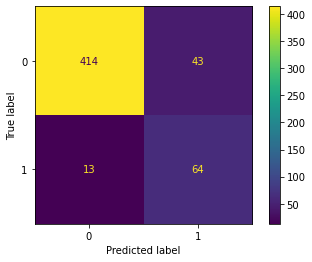

,Accuracy,Precision,Recall,F1
0,0.895131,0.598131,0.831169,0.695652


In [95]:
evaluate(rf_model2, x_val, y_val)

Based on metric to monitor which is the False negative, we can see that the recall improved having used tunned with multiple hyper parameters 

Also, talking from angle of overfitting or underfitting, we can see that it improved on training and the recall improved relative to the one with just a single hyper parameter 